In [38]:
import numpy as np
import pandas as pd
import pycaret 
import seaborn as sns 
import matplotlib.pyplot as plt

In [39]:
pd.set_option('display.max_columns', None)  # This removes the limit on column display

In [40]:
test = pd.read_csv("kaggle_files/test.csv")
train = pd.read_csv("kaggle_files/train.csv")

In [41]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [42]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: xlabel='SalePrice', ylabel='Count'>

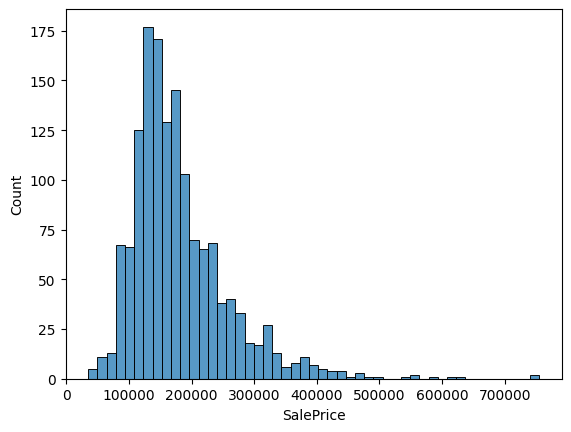

In [44]:
sns.histplot(train['SalePrice'])

In [45]:
percentile25 = train["SalePrice"].quantile(0.25)
percentile75 = train["SalePrice"].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr 
print("percenttile 75:", percentile75)
print("percenttile 25:", percentile25)
print("iqr: ",iqr)
print("")
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

percenttile 75: 214000.0
percenttile 25: 129975.0
iqr:  84025.0

Upper limit:  340037.5
Lower limit:  3937.5


In [46]:
trimmed_train = train[train["SalePrice"] < upper_limit]
trimmed_train = trimmed_train[trimmed_train["SalePrice"] > lower_limit]

<Axes: xlabel='SalePrice', ylabel='Count'>

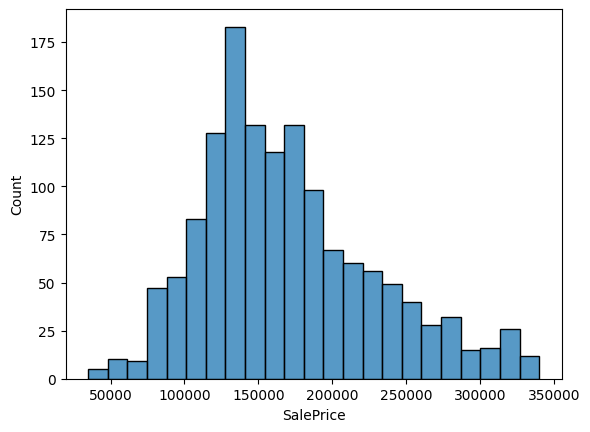

In [47]:
sns.histplot(trimmed_train['SalePrice'])

In [48]:
trimmed_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1399 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1399 non-null   int64  
 1   MSSubClass     1399 non-null   int64  
 2   MSZoning       1399 non-null   object 
 3   LotFrontage    1143 non-null   float64
 4   LotArea        1399 non-null   int64  
 5   Street         1399 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1399 non-null   object 
 8   LandContour    1399 non-null   object 
 9   Utilities      1399 non-null   object 
 10  LotConfig      1399 non-null   object 
 11  LandSlope      1399 non-null   object 
 12  Neighborhood   1399 non-null   object 
 13  Condition1     1399 non-null   object 
 14  Condition2     1399 non-null   object 
 15  BldgType       1399 non-null   object 
 16  HouseStyle     1399 non-null   object 
 17  OverallQual    1399 non-null   int64  
 18  OverallCond  

In [49]:
numeric_columns = trimmed_train.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = trimmed_train[numeric_columns].corr()
correlation_matrix = correlation_matrix["SalePrice"]
highest_correlation_variable = correlation_matrix.drop("SalePrice").idxmax()
highest_correlation_value = correlation_matrix[highest_correlation_variable]
correlation_matrix.head(90).sort_values()

KitchenAbvGr    -0.147385
EnclosedPorch   -0.144996
MSSubClass      -0.060111
LowQualFinSF    -0.058086
OverallCond     -0.048005
YrSold          -0.028245
BsmtHalfBath    -0.018827
MiscVal         -0.012872
Id              -0.011984
BsmtFinSF2       0.007154
3SsnPorch        0.043324
PoolArea         0.048682
MoSold           0.070478
ScreenPorch      0.108851
BedroomAbvGr     0.201610
BsmtFullBath     0.202185
BsmtUnfSF        0.222795
LotArea          0.249812
HalfBath         0.278831
BsmtFinSF1       0.290377
WoodDeckSF       0.302339
2ndFlrSF         0.317358
LotFrontage      0.319597
OpenPorchSF      0.325791
MasVnrArea       0.352794
Fireplaces       0.453010
TotRmsAbvGrd     0.472292
GarageYrBlt      0.507894
1stFlrSF         0.522785
YearRemodAdd     0.541161
TotalBsmtSF      0.543508
YearBuilt        0.564558
FullBath         0.577369
GarageArea       0.607230
GarageCars       0.628013
GrLivArea        0.661325
OverallQual      0.784294
SalePrice        1.000000
Name: SalePr

In [50]:
print(f"The variable with the highest absolute correlation to SalePrice is '{highest_correlation_variable}' with a correlation of {highest_correlation_value:.2f}")

The variable with the highest absolute correlation to SalePrice is 'OverallQual' with a correlation of 0.78


In [51]:
all_data_na = (trimmed_train.isnull().sum() / len(trimmed_train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.571122
MiscFeature,96.140100
Alley,93.495354
Fence,80.200143
MasVnrType,61.543960
FireplaceQu,49.249464
LotFrontage,18.298785
GarageType,5.789850
GarageYrBlt,5.789850
GarageFinish,5.789850


In [52]:
trimmed_train.drop(["PoolQC", "MiscFeature", "Alley", "Fence"], axis=1, inplace=True)

In [53]:
trimmed_train["FireplaceQu"] = trimmed_train["FireplaceQu"].fillna("None")
trimmed_train["MasVnrType"] = trimmed_train["MasVnrType"].fillna("None")
trimmed_train["LotFrontage"] = trimmed_train["LotFrontage"].fillna(0)
trimmed_train["GarageType"] = trimmed_train["GarageType"].fillna("None")
trimmed_train["GarageYrBlt"] = trimmed_train["GarageYrBlt"].fillna(0)
trimmed_train["GarageFinish"] = trimmed_train["GarageFinish"].fillna("None")
trimmed_train["GarageQual"] = trimmed_train["GarageQual"].fillna("None")
trimmed_train["GarageCond"] = trimmed_train["GarageCond"].fillna("None")
trimmed_train["BsmtFinType2"] = trimmed_train["BsmtFinType2"].fillna("None")
trimmed_train["BsmtExposure"] = trimmed_train["BsmtExposure"].fillna("None")
trimmed_train["BsmtFinType1"] = trimmed_train["BsmtFinType1"].fillna("None")
trimmed_train["BsmtCond"] = trimmed_train["BsmtCond"].fillna("None")
trimmed_train["BsmtQual"] = trimmed_train["BsmtQual"].fillna("None")
trimmed_train["MasVnrArea"] = trimmed_train["MasVnrArea"].fillna(0)
trimmed_train["Electrical"] = trimmed_train["Electrical"].fillna("None")



In [54]:
trimmed_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1399 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1399 non-null   int64  
 1   MSSubClass     1399 non-null   int64  
 2   MSZoning       1399 non-null   object 
 3   LotFrontage    1399 non-null   float64
 4   LotArea        1399 non-null   int64  
 5   Street         1399 non-null   object 
 6   LotShape       1399 non-null   object 
 7   LandContour    1399 non-null   object 
 8   Utilities      1399 non-null   object 
 9   LotConfig      1399 non-null   object 
 10  LandSlope      1399 non-null   object 
 11  Neighborhood   1399 non-null   object 
 12  Condition1     1399 non-null   object 
 13  Condition2     1399 non-null   object 
 14  BldgType       1399 non-null   object 
 15  HouseStyle     1399 non-null   object 
 16  OverallQual    1399 non-null   int64  
 17  OverallCond    1399 non-null   int64  
 18  YearBuilt    

In [56]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb